# Zomato Data Analysis

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants as well as food delivery options from partner restaurants in select cities.

## Problem Statement
In this session, we are going to analyze the restaurant business data. We want to study the food habbits of zomato users, their preferances, ratings etc. 

## Data description:

The collected data has been stored in the Comma Separated Value file Zomato.csv. Each restaurant in the dataset is uniquely identified by its Restaurant Id. Every Restaurant contains the following variables:

• **Restaurant Id**: Unique id of every restaurant across various cities of the world

• **Restaurant Name**: Name of the restaurant

• **Country Code**: Country in which restaurant is located

• **City**: City in which restaurant is located

• **Address**: Address of the restaurant

• **Locality**: Location in the city

• **Locality Verbose**: Detailed description of the locality

• **Longitude**: Longitude coordinate of the restaurant's location

• **Latitude**: Latitude coordinate of the restaurant's location

• **Cuisines**: Cuisines offered by the restaurant

• **Average Cost for two**: Cost for two people in different currencies 👫 

• **Currency**: Currency of the country

• **Has Table booking**: yes/no

• **Has Online delivery**: yes/ no

• **Is delivering**: yes/ no

• **Switch to order menu**: yes/no

• **Price range**: range of price of food

• **Aggregate Rating**: Average rating out of 5

• **Rating color**: depending upon the average rating color

• **Rating text**: text on the basis of rating of rating

• **Votes**: Number of ratings casted by people


**There is another dataset which has the country codes in it**

### Import Libraries

In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Read the data and merge the two different datasets

In [2]:
df = pd.read_csv('../data/zomato.csv', encoding='ISO-8859-1')
df.head(2)

Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...          Currency Has Table booking  \
0  French, Japanese, Desserts  ...  Botswana Pula(P)               Yes   
1                    Japanese  ...  Botswana Pula(P)               Yes   

  Has Online delivery Is delivering now Switch to order menu Price range  \
0                  No                No                   No           3   
1                  No                No                   No           3   

   Aggregate rating  Rating color Rating text Votes  
0               4.8    Dark Green   Excellent   314  
1               4.5    Dark Green   Excellent   591  

[2 rows x 21 columns]

#### Read Country Name

In [3]:
country = pd.read_excel('../data/Country-Code.xlsx')
country.head()

Country Code    Country
0             1      India
1            14  Australia
2            30     Brazil
3            37     Canada
4            94  Indonesia

In [4]:
df = df.merge(country, on='Country Code')
df[['Country Code', 'Country']].head()

Country Code      Country
0           162  Phillipines
1           162  Phillipines
2           162  Phillipines
3           162  Phillipines
4           162  Phillipines

### Basic Data Study

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [6]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

### Number of Restaurants by Country on Zomato


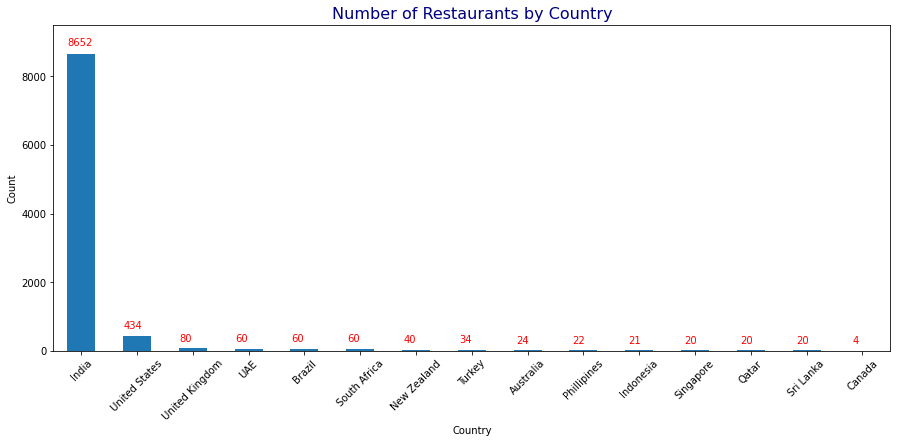

In [7]:
ax = df['Country'].value_counts().plot.bar(figsize=(15, 6))

# Annotate bars in the graph
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.005, (p.get_height()+200)*1.005), color='r')
    
plt.title('Number of Restaurants by Country', fontsize=16, color='navy')
plt.xlabel('Country')
plt.ylabel('Count')
plt.ylim([0, 9500])
plt.xticks(rotation=45)
plt.show()

### Which city has the maximum number of Restaurents?

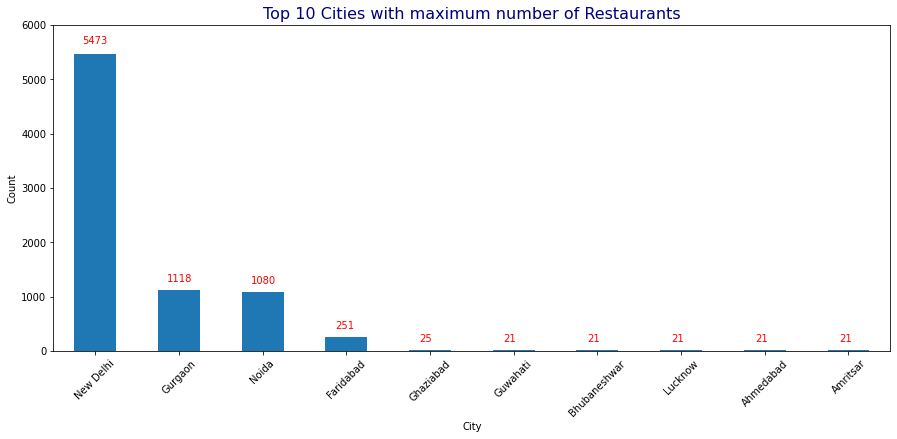

In [8]:
ax = df['City'].value_counts()[:10].plot.bar(figsize=(15, 6))

# Annotate bars in the graph
for p in ax.patches:
    ax.annotate(str(p.get_height()), ((p.get_x()+0.1)*1.005, (p.get_height()+150)*1.005), color='r')
    
plt.title('Top 10 Cities with maximum number of Restaurants', fontsize=16, color='navy')
plt.xlabel('City')
plt.ylabel('Count')
plt.ylim([0, 6000])
plt.xticks(rotation=45)
plt.show()

### What is the condition of online delivery in India ?

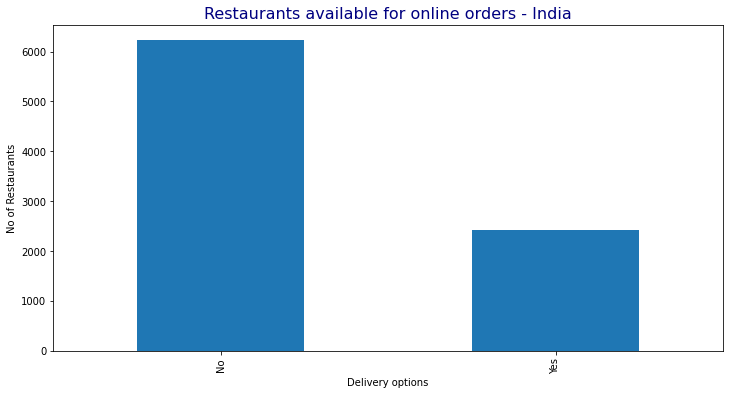

In [9]:
df[df['Country']=='India']['Has Online delivery'].value_counts().plot.bar(figsize=(12, 6))
plt.title('Restaurants available for online orders - India', fontsize=16, color='navy')
plt.xlabel('Delivery options')
plt.ylabel('No of Restaurants')
plt.show()

### What are the top cuisines on Zomato?

In [10]:
cuisines = []
for v in df['Cuisines'].values:
    if isinstance(v, str):
        for c in v.split(','):
            cuisines.append(c.strip())

cuisines = pd.Series(cuisines)
cuisines.head()

0      French
1    Japanese
2    Desserts
3    Japanese
4     Seafood
dtype: object

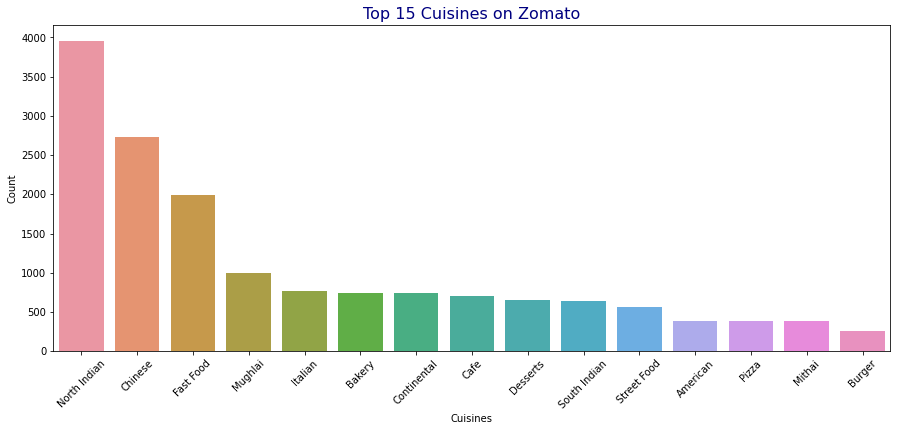

In [11]:
top_15 = cuisines.value_counts().nlargest(15)

plt.figure(figsize=(15, 6))
sns.barplot(x=top_15.index, y=top_15.values)
plt.title('Top 15 Cuisines on Zomato', fontsize=16, color='navy')
plt.xlabel('Cuisines')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Top Cuisines by City

In [12]:
city_cuisines = []

for idx, row in df.iterrows():
    if isinstance(row['Cuisines'], str):
        city = row['City']
        
        for c in row['Cuisines'].split(','):
            city_cuisines.append({
                'city': city,
                'cuisines': c.strip()
            })

city_cuisines_df = pd.DataFrame(city_cuisines)
city_cuisines_df.head()

city  cuisines
0       Makati City    French
1       Makati City  Japanese
2       Makati City  Desserts
3       Makati City  Japanese
4  Mandaluyong City   Seafood

In [13]:
cus_counts = pd.DataFrame(city_cuisines_df.groupby('city')['cuisines'].value_counts())
cus_counts.columns = ['counts']
cus_counts.reset_index(inplace=True)

In [14]:
cus_counts[cus_counts['cuisines'] == 'North Indian'].sort_values(by='counts', ascending=False).head(10)

city      cuisines  counts
1159   New Delhi  North Indian    2425
1240       Noida  North Indian     532
703      Gurgaon  North Indian     508
625    Faridabad  North Indian     122
1484      Ranchi  North Indian      16
96      Amritsar  North Indian      15
186   Aurangabad  North Indian      15
27          Agra  North Indian      15
1333       Patna  North Indian      15
1117      Mysore  North Indian      12

## All this is something we have already done before and will do it later as well, isn't it? 
## Is there a better way to find out these insgihts without writing much of the code.
## This is where Pandas_profiling library enters

We need to check are we able to answer the above asked questions with it:

* Number of Restaurants by Country on Zomato
* Which city has the maximum number of Restaurants?
* What is the condition of online delivery in India ?
* What are the top cuisines on Zomato?

**Conda install the library**

In [15]:
from pandas_profiling import ProfileReport

profile = ProfileReport(df, title='Pandas Profiling Report')
profile

Summarize dataset:   0%|          | 0/35 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Average Ratings on Countries

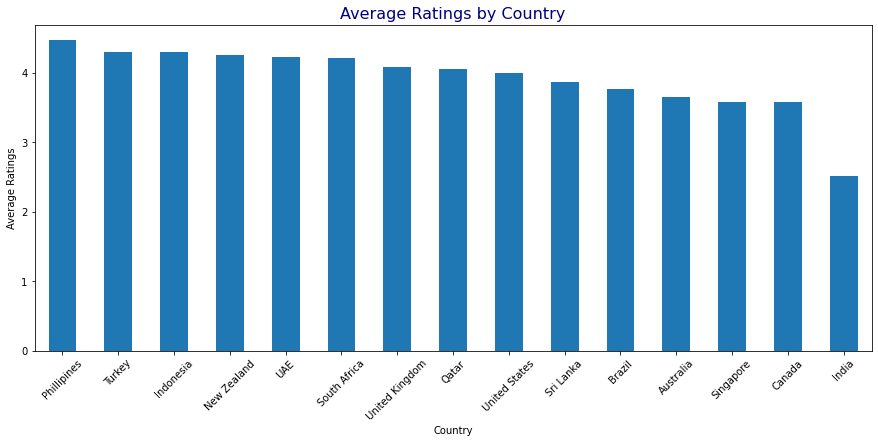

In [16]:
df.groupby('Country')['Aggregate rating'].mean().sort_values(ascending=False).plot.bar(figsize=(15, 6))
plt.title('Average Ratings by Country', fontsize=16, color='navy')
plt.xlabel('Country')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45)
plt.show()

**Is the restaurent industry so bad or is there something we are missing?**

### Plot the ratings histogram for Indian restaurents

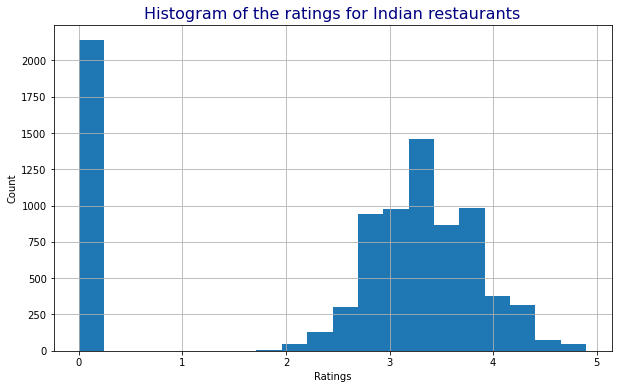

In [17]:
plt.figure(figsize=(10, 6))
df[df['Country'] == 'India']['Aggregate rating'].hist(bins=20)
plt.title('Histogram of the ratings for Indian restaurants', fontsize=16, color='navy')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

### More than 2000 restaurents have been rated 0. Check the rating text as well as the votes of these restaurants 

In [18]:
df[df['Aggregate rating'] == 0]['Rating text'].unique()

array(['Not rated'], dtype=object)

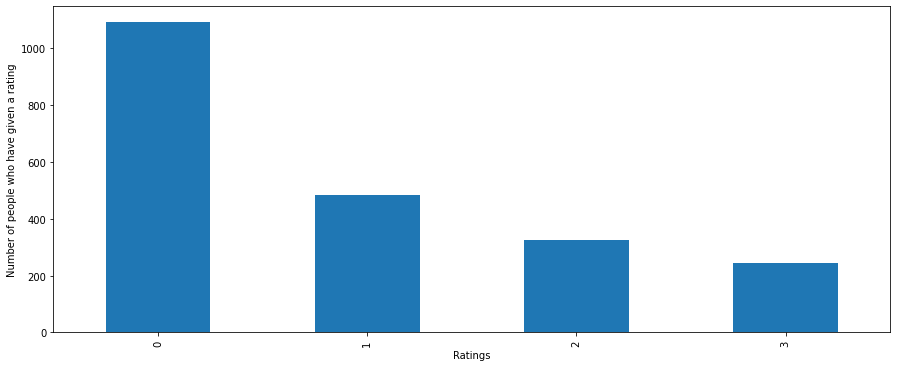

In [19]:
df[df['Aggregate rating'] == 0]['Votes'].value_counts().plot.bar(figsize =(15, 6))
plt.xlabel('Ratings')
plt.ylabel('Number of people who have given a rating')
plt.show()

**As you can see, the average ratings is getting influenced by the fact that there are multiple restaurents which have less than 3 votes and mostly 0 votes. If you check the Rating text for these which says `Not Rated` as well**

## Word cloud for the most popular restaurants

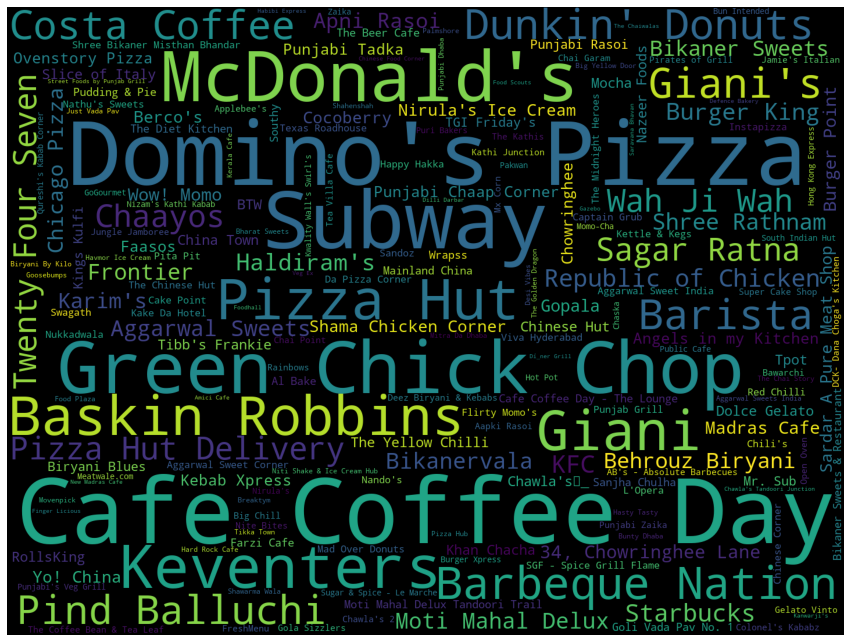

In [20]:
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)
wordcloud = (
    WordCloud(width=1440, height=1080, relative_scaling=0.5, stopwords=stopwords
             ).generate_from_frequencies(df['Restaurant Name'].value_counts()))

fig = plt.figure(1,figsize=(15, 15))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()